<br><br><br><br>

<CENTER><font size=12px, face = \"times new roman\">Machine Learning</font></CENTER>

<br><br><br><br>


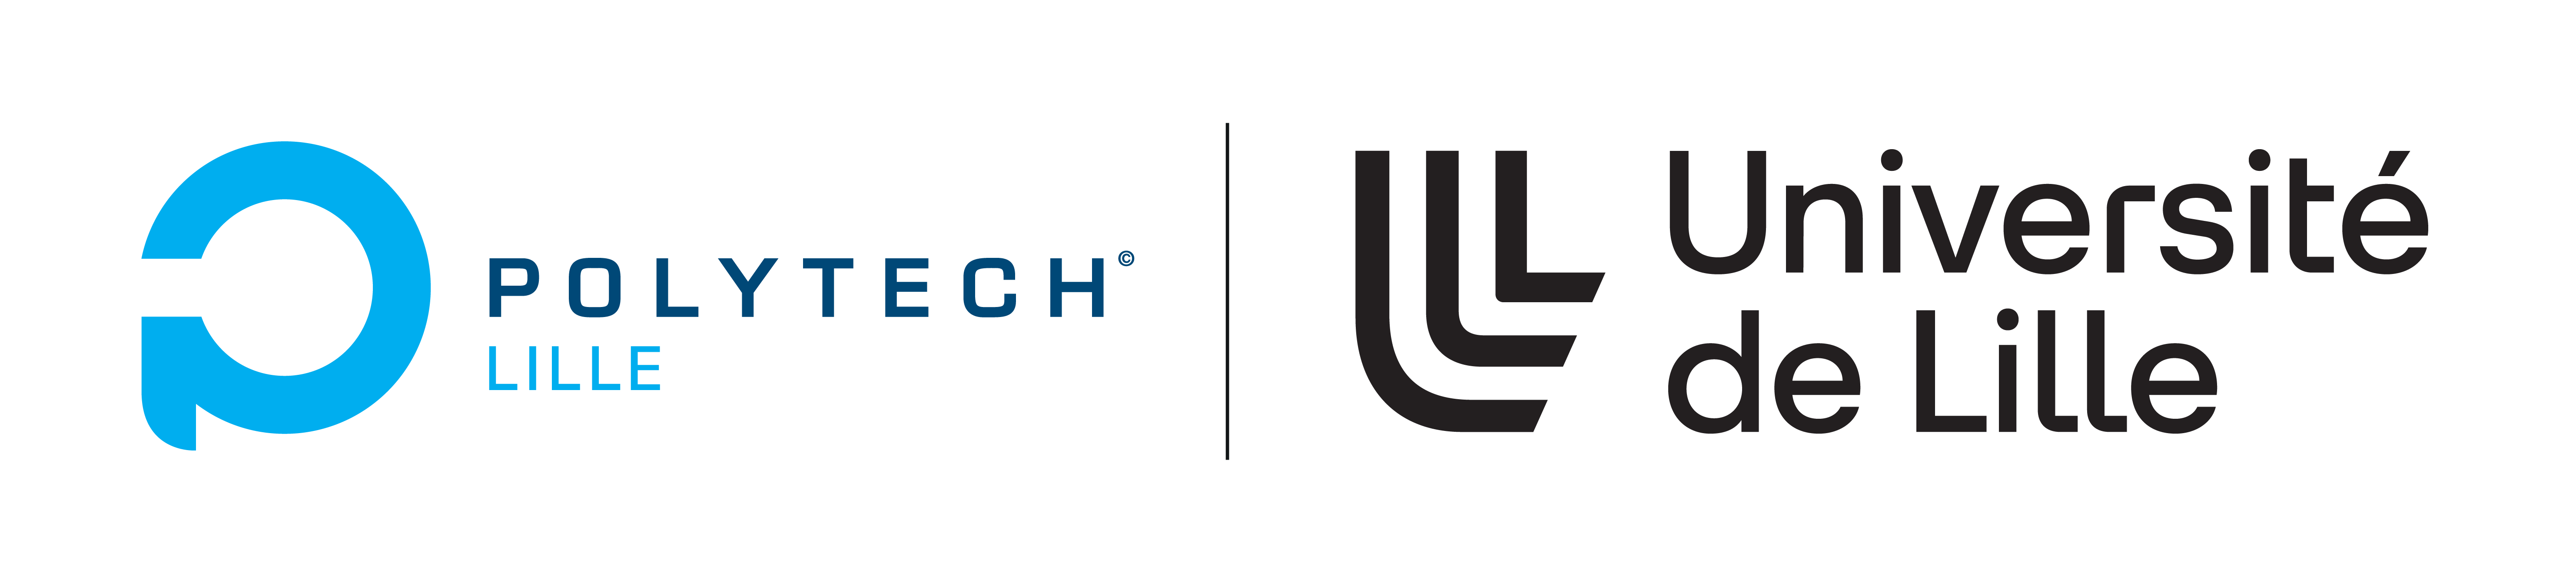

<p><CENTER>Elève:&emsp;MASSON KEVIN <br>Enseignants:&emsp;KESSACI&ensp;ROUSSEL</CENTER></p>

### Arbres de décisions

Nous allons utiliser le module [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) pour prédire les classes.
Nous allons dans la suite du TP uniquement étudier les arbres de décisions et des techniques ensemblistes utilisant ces arbres. Nous illustrerons certains comportements uniquement sur les jeux de données _iris_ et _digits_.

Le module de sklearn _DecisionTreeClassifier_ présente plusieurs paramètres peuvant être instanciés pour modifier le comportement de l'algorithme.
Intéressons nous aux paramètres : max_depth, max_features and random_state.

Fixons ```random_state=2``` et  ```max_features=None``` puis faisons prendre les valeurs {1,2,4,None} à ```max_depth```.


Considérons deux ensembles _train_ et _test_ comme construits précédement à partir de la totalité du jeux de données (```random_state=3```) en faisant varier les valeurs de ```test_size``` dans l'ensemble {0.20,0.33,0.5}.


Vous pouvez afficher l'arbre de décision (sous format graphique ou texte) en important respectivement des modules via les commandes ```from sklearn import tree``` et ```from sklearn.tree import export_text```.


**§ Est-il nécessaire de normaliser ces jeux de données et pourquoi ?**
<br>Pour un arbre de décision de classification, il n'est pas nécessaire d'effectuer une normalisation car elle ne modifie pas le résultat.

**§ Expliquer l'intérêt de ces trois paramètres et quelles valeurs ils peuvent prendre**
<br> <ul>
    <li>Random_state = 2 permet de fixer le générateur de nombre aléatoire. Celui-ci prend la valeur d'un int en parametre</li>
    <li>max_features=None fixe le nombre de fonctionnalité (features). Celui-ci prend int, float, {"auto", "sqrt", "log2"}, or None en parametre.</li>
    <li>max_depth permet de fixer le nombre de noeud de notre arbre.Celui-ci prend un int en parametre.</li>
    </ul>
   
   


In [46]:
from sklearn.datasets import load_iris,load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
myiris, mydigits= load_iris(as_frame= True), load_digits()

**IRIS**

Accuracy: 66.67%


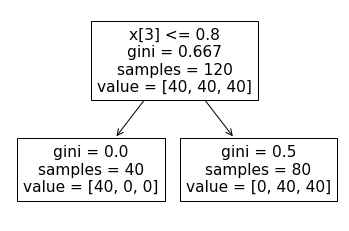

Accuracy: 96.67%


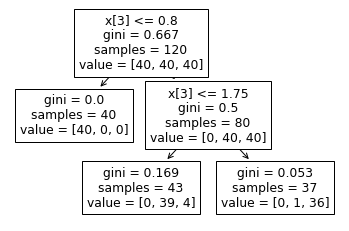

Accuracy: 100.00%


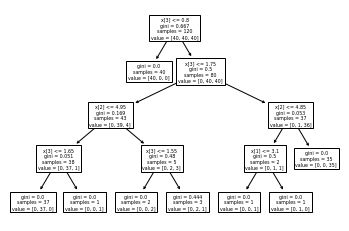

Accuracy: 100.00%


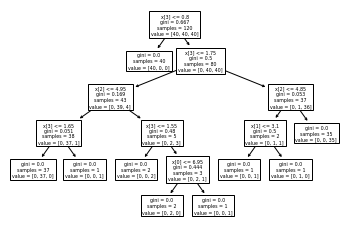

Accuracy: 66.00%


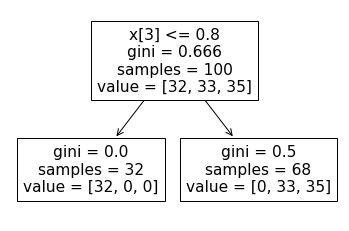

Accuracy: 92.00%


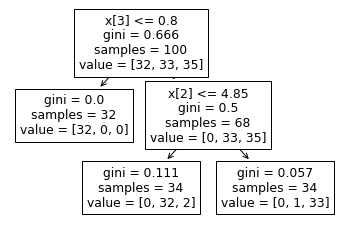

Accuracy: 94.00%


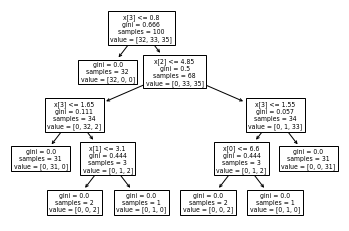

Accuracy: 94.00%


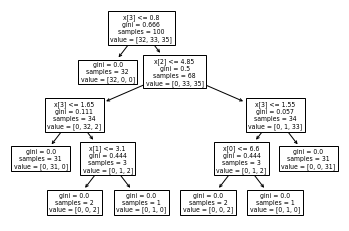

Accuracy: 54.67%


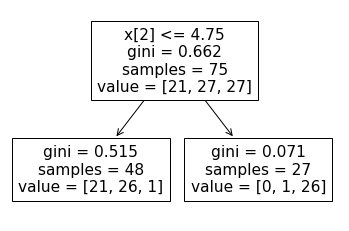

Accuracy: 93.33%


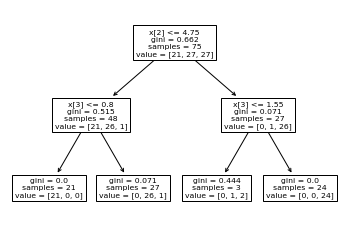

Accuracy: 94.67%


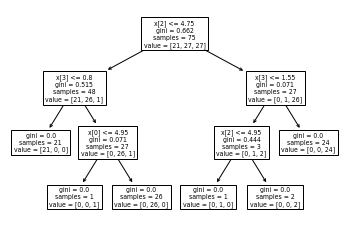

Accuracy: 94.67%


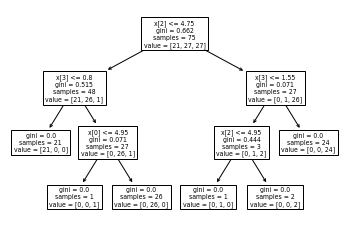

[[ 66.66666667  96.66666667 100.         100.        ]
 [ 66.          92.          94.          94.        ]
 [ 54.66666667  93.33333333  94.66666667  94.66666667]]


In [69]:
tab=np.zeros((3,4))
X = myiris.frame.iloc[:,0:4]
y = myiris.frame.iloc[:,4]
k=0
for i in (0.20,0.33,0.5):
    n=0
    for j in (1,2,4,None):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=i, random_state=3)
        clf = tree.DecisionTreeClassifier(random_state = 2, max_features = None, max_depth = j)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print("Accuracy: %.2f%%" % (accuracy_score(y_test,y_pred) * 100.0))
        tab[k,n]=accuracy_score(y_test,y_pred) * 100.0
        tree.plot_tree(clf)
        plt.show()
        n=n+1
    k=k+1
print(tab)

**DIGITS**

Accuracy: 14.17%


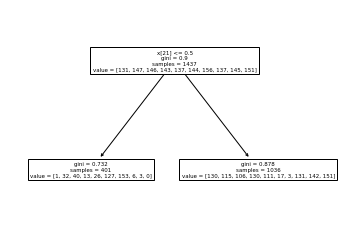

Accuracy: 33.06%


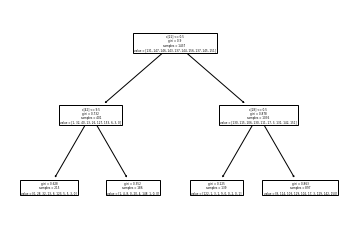

Accuracy: 61.11%


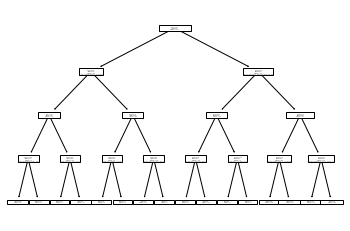

Accuracy: 84.44%


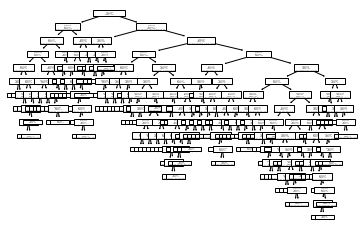

Accuracy: 16.84%


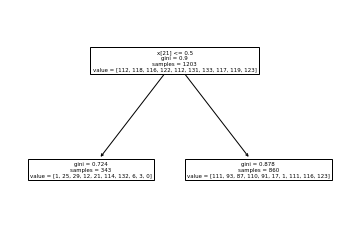

Accuracy: 33.50%


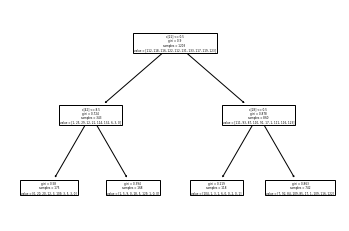

Accuracy: 63.64%


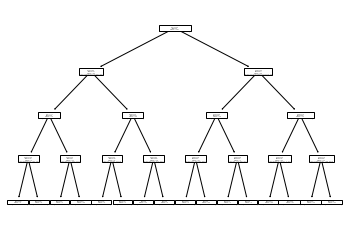

Accuracy: 83.50%


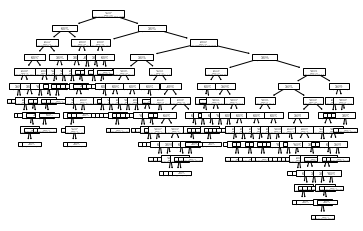

Accuracy: 17.35%


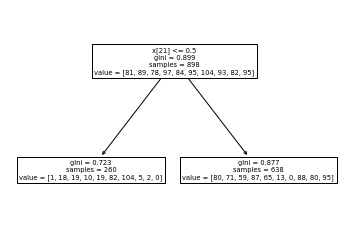

Accuracy: 34.82%


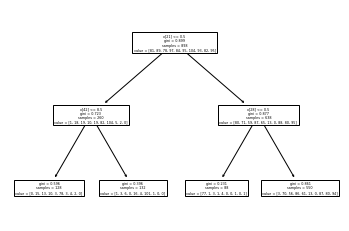

Accuracy: 60.07%


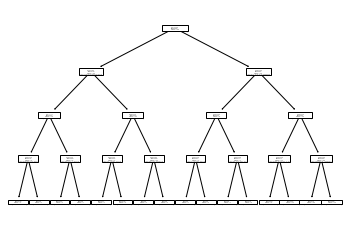

Accuracy: 80.65%


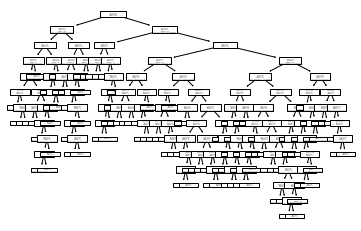

[[14.16666667 33.05555556 61.11111111 84.44444444]
 [16.83501684 33.5016835  63.63636364 83.5016835 ]
 [17.35261402 34.81646274 60.06674082 80.64516129]]


In [71]:
tab=np.zeros((3,4))
X = mydigits.data
y = mydigits.target
k=0
for i in (0.20,0.33,0.5):
    n=0
    for j in (1,2,4,None):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=i, random_state=3)
        clf = tree.DecisionTreeClassifier(random_state = 2, max_features = None, max_depth = j)
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print("Accuracy: %.2f%%" % (accuracy_score(y_test,y_pred) * 100.0))
        tab[k,n]=accuracy_score(y_test,y_pred) * 100.0
        tree.plot_tree(clf)
        plt.show()
        n=n+1
    k=k+1
print(tab)

**§ Que remarquez-vous ? Donner votre analyse des résultats**

Concernant le jeu de données Iris, on remarque d'après notre tableau une augmentation de la précision en lien avec l'augmentation du nombre de noeuds. Les 2 dernières colonnes sont identiques puisque max_depth = None = 4 (nombre de noeuds maximal est égal à 4)
<br>
On obtient des résultats similaires pour le jeu de données Digits, cependant le nombre de noeuds maximal étant supérieur à 4, la dernière colonne est donc cette fois-ci différente.

Maintenant intéressons nous à la méthodologie d'entrainement avec un jeu de données. Jusqu'ici nous avons utilisé la méthode qui consiste à séparer le jeu de données pour obtenir un jeu d'entrainement et un jeu de test. Etudions ici l'intérêt de la [validation croisée](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation). Pour cela, il est nécessaire d'importer un module via la commande 
```from sklearn.model_selection import cross_val_score```.

Pour commencer, instancions un arbre de décision comme suit : 
```dt = tree.DecisionTreeClassifier(random_state=2,max_depth=4)```

Pour obtenir (et afficher) le résultat de cette instanciation sur le jeu de données (complet) X et la classe associée y par validation croisée, il suffit d'exécuter la commande : 
```cross_val_score(dt, X, y, cv=5)```



**§ Regarder la doc en ligne du module ```cross_val_score``` et expliquer la méthode de validation croisée effectuée**

In [95]:
from sklearn.model_selection import cross_val_score
X = myiris.frame.iloc[:,0:4]
y = myiris.frame.iloc[:,4]
dt = tree.DecisionTreeClassifier(random_state=2,max_depth=4)
cross_val_score(clf, X, y, cv=5).mean()

0.9600000000000002

**§ Comparer ce résultat à celui obtenu précédement pour la même version du classifier**
<br>
Sachant que l'on a fixé max_depth à 4, on trouve des résultats du cross validation proche du résultat précédement calculé. Ainsi, en faisant une validation croisée, on obtient des valeurs d'accuracy plus représentatives de la vraie précision de notre modèle.

Etudions aussi d'autres modèles classiques de validation croisée :
* K-fold (commande ```from sklearn.model_selection import KFold```)
* Repeated K-fold (commande ```from sklearn.model_selection import RepeatedKFold```)
* Repeated Stratified K-fold (commande ```from sklearn.model_selection import RepeatedStratifiedKFold```)
* LeaveOneOut (commande ```from sklearn.model_selection import LeaveOneOut```)

Tester ces méthodes avec l'arbre de décision précédent et les valeurs ```n_splits=5``` et ```n_repeats=5``` lorsque c'est applicable. 
Par exemple pour la méthode K-fold, la commande ```kf = KFold(n_splits=5)``` instancie un objet kf afin de faire une validation croisée 5-fold et la commande ```cross_val_score(dt, X, y, cv=kf)``` exécute la validation croisée 5-fold.
La moyenne des accuracy est accessible via la méthode ```.mean()``` du module ```cross_val_score```.


**§ Regarder la doc en ligne et expliquer ces quatre méthodes de validation croisée**

**§ Exécuter les 5 méthodes et analyser les résultats**

In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import LeaveOneOut

In [94]:
dt = tree.DecisionTreeClassifier(random_state=2,max_depth=4)
kf = KFold(n_splits=5)
cross_val_score(dt, X, y, cv=kf).mean()

0.9133333333333333

In [99]:
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=2)
cross_val_score(dt, X, y, cv=rkf).mean()

0.9333333333333333

In [100]:
rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=2,random_state=2)
cross_val_score(dt, X, y, cv=rskf).mean()

0.9433333333333334

In [101]:
loo = LeaveOneOut()
cross_val_score(dt, X, y, cv=loo).mean()

0.9533333333333334


**§ Quel est l'intérêt de la validation croisée par rapport au découpage train/test du jeu de données ?**